## Task 4 - Analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In [1]:
# Import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('advertising (1).csv')

In [3]:
# First five rows
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Last five rows
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
# Shape of data
data.shape

(200, 4)

* Dataset contains 4 features with 200 observations.

In [6]:
# Columns in data
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# Statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [9]:
# Check duplicate
data.duplicated().sum()

0

## Exploratory Data Analysis

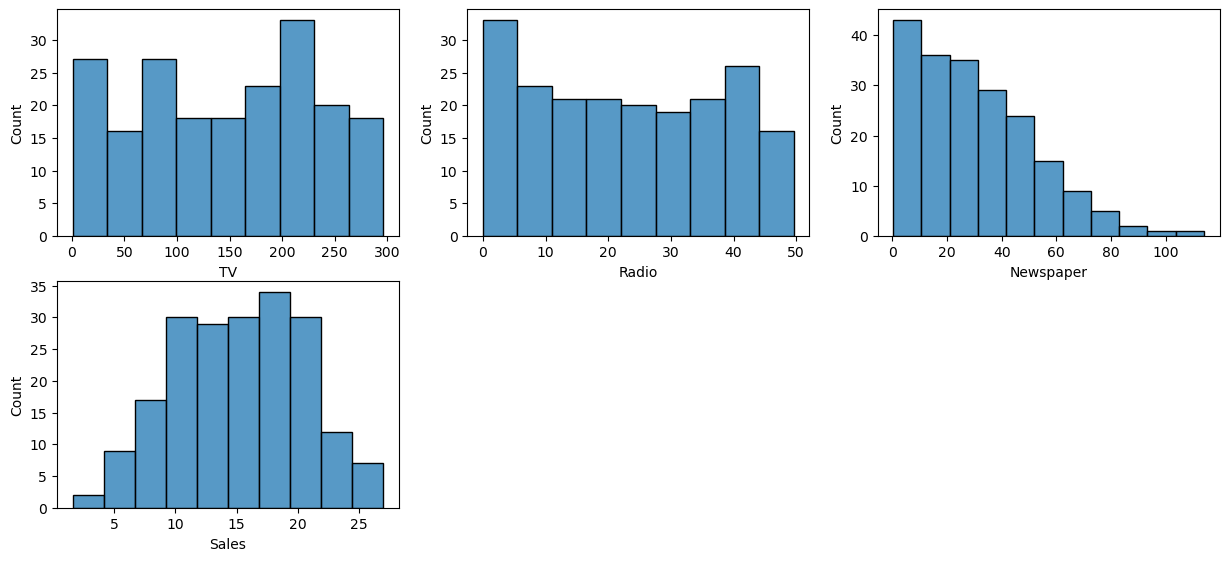

In [10]:
# Univariate Analysis
plt.figure(figsize=(15,10))
plotnumber=1

for column in data:
    if plotnumber<=14:
        plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column],data=data)
    plotnumber+=1
plt.show()

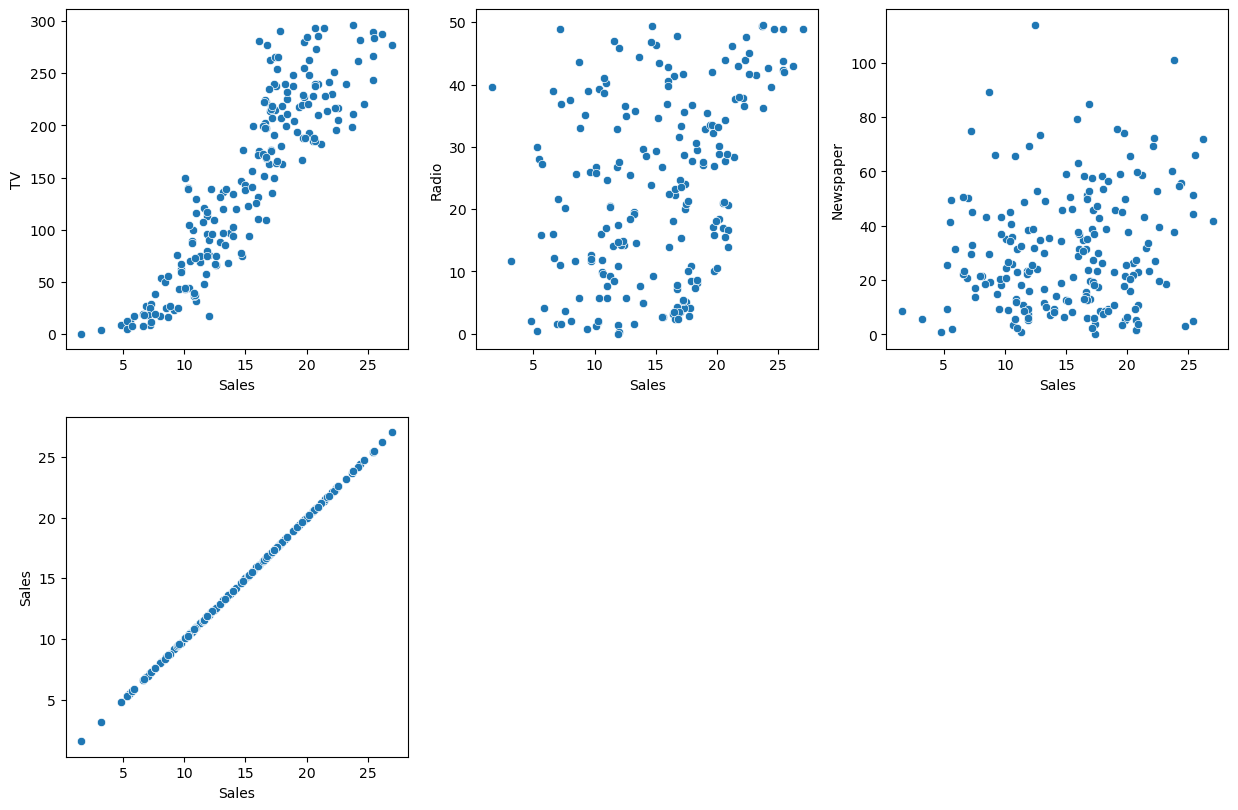

In [11]:
# Bivariate Analysis
plt.figure(figsize=(15,15),facecolor='white')
plotno = 1 ## counter

for column in data:
    if plotno<=20: ## acessing the column
        plt.subplot(3,3,plotno) 
        sns.scatterplot(x='Sales',y=data[column],data=data)
        plotno+=1 ## counter increment
# show plot
plt.show()

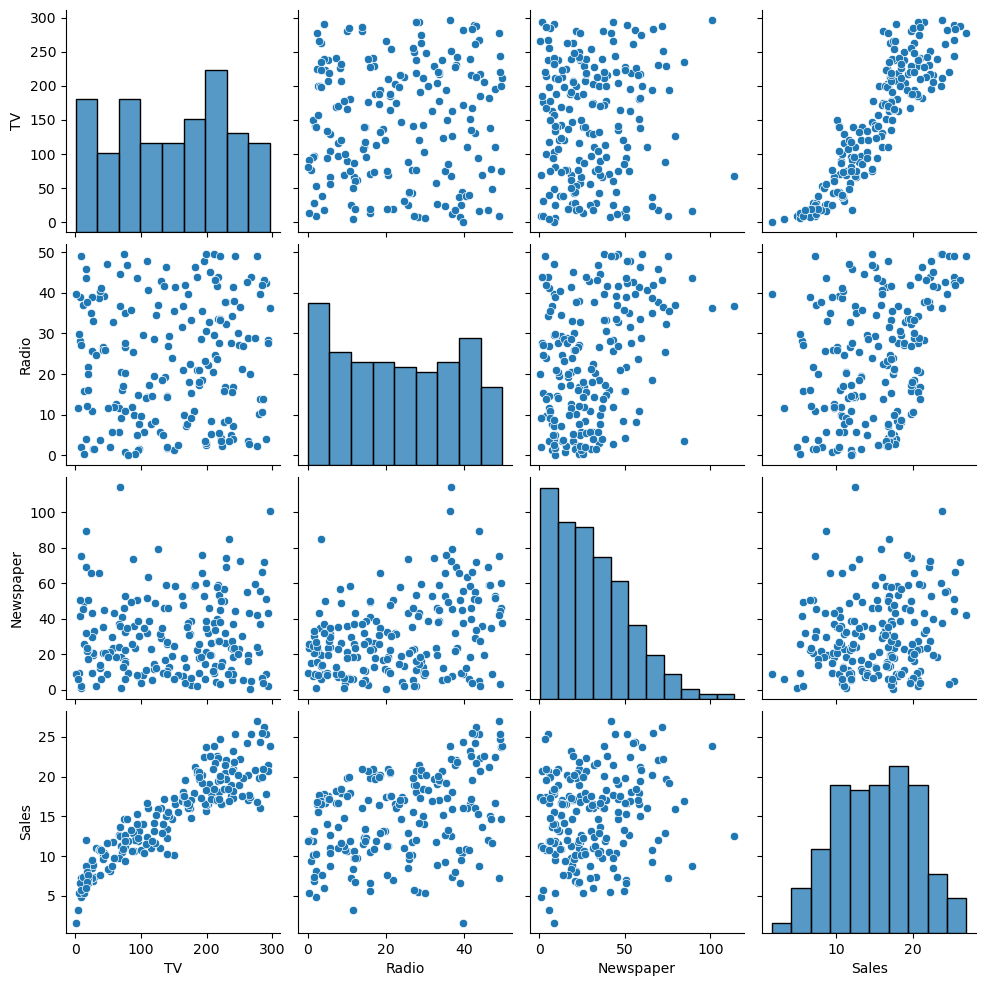

In [12]:
# Multivariate Analysis
sns.pairplot(data)

## Data Preprocessing

In [13]:
# Check missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Feature Selection

<AxesSubplot:>

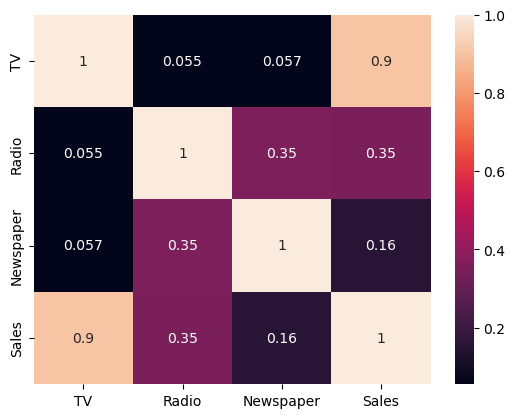

In [14]:
# Check Correlation
sns.heatmap(data.corr(),annot=True)

## Model Building

In [15]:
# Defining x & y
x = data.drop('Sales',axis=1)
y = data.Sales

In [16]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_lr_pred = lr.predict(x_test)
print(y_lr_pred)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


In [20]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_test,y_lr_pred))

0.9059011844150826


In [21]:
print(mean_absolute_error(y_test,y_lr_pred))

1.2748262109549338


In [22]:
import math
print(mean_squared_error(y_test,y_lr_pred))
print(math.sqrt(mean_squared_error(y_test,y_lr_pred))) # root mean squared error

2.907756910271091
1.7052146229349228
